In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd 
import matplotlib.ticker as ticker
from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [50]:
p = pd.read_excel(r"C:\Users\gg\Desktop\proj\2\rit.xlsx")

In [51]:
p.iloc[0:19064,1]

0          1.000
1          0.000
2          1.000
3          1.000
4          2.000
          ...   
19059     99.980
19060     99.985
19061     99.990
19062     99.995
19063    100.000
Name: 2, Length: 19064, dtype: float64

In [52]:
theta = p.iloc[63:19064,1]
exp = p.iloc[63:19064,2]
ras = p.iloc[63:19064,3]
raz = exp - ras 
breg_x = p.iloc[0:62,6]
breg_y = np.array([0 for i in range(1,63)]) - 0.05 


In [53]:
f = interp1d(theta,ras,kind='quadratic')

In [58]:
m = max(ras)
m

41839.1

In [55]:
f(np.array(breg_x)[0:17])

array([12876.35329884, 20820.63873143,  5968.63147566,  4355.03535015,
       20773.31824082, 10941.1479165 ,  4254.77217183, 36495.38113985,
        4348.93850726,  3408.9396774 ,  9692.17397368,  6524.78711299,
        7902.01883983,  3731.67820165,  3422.47163108, 12740.81258126,
        9909.42230265])

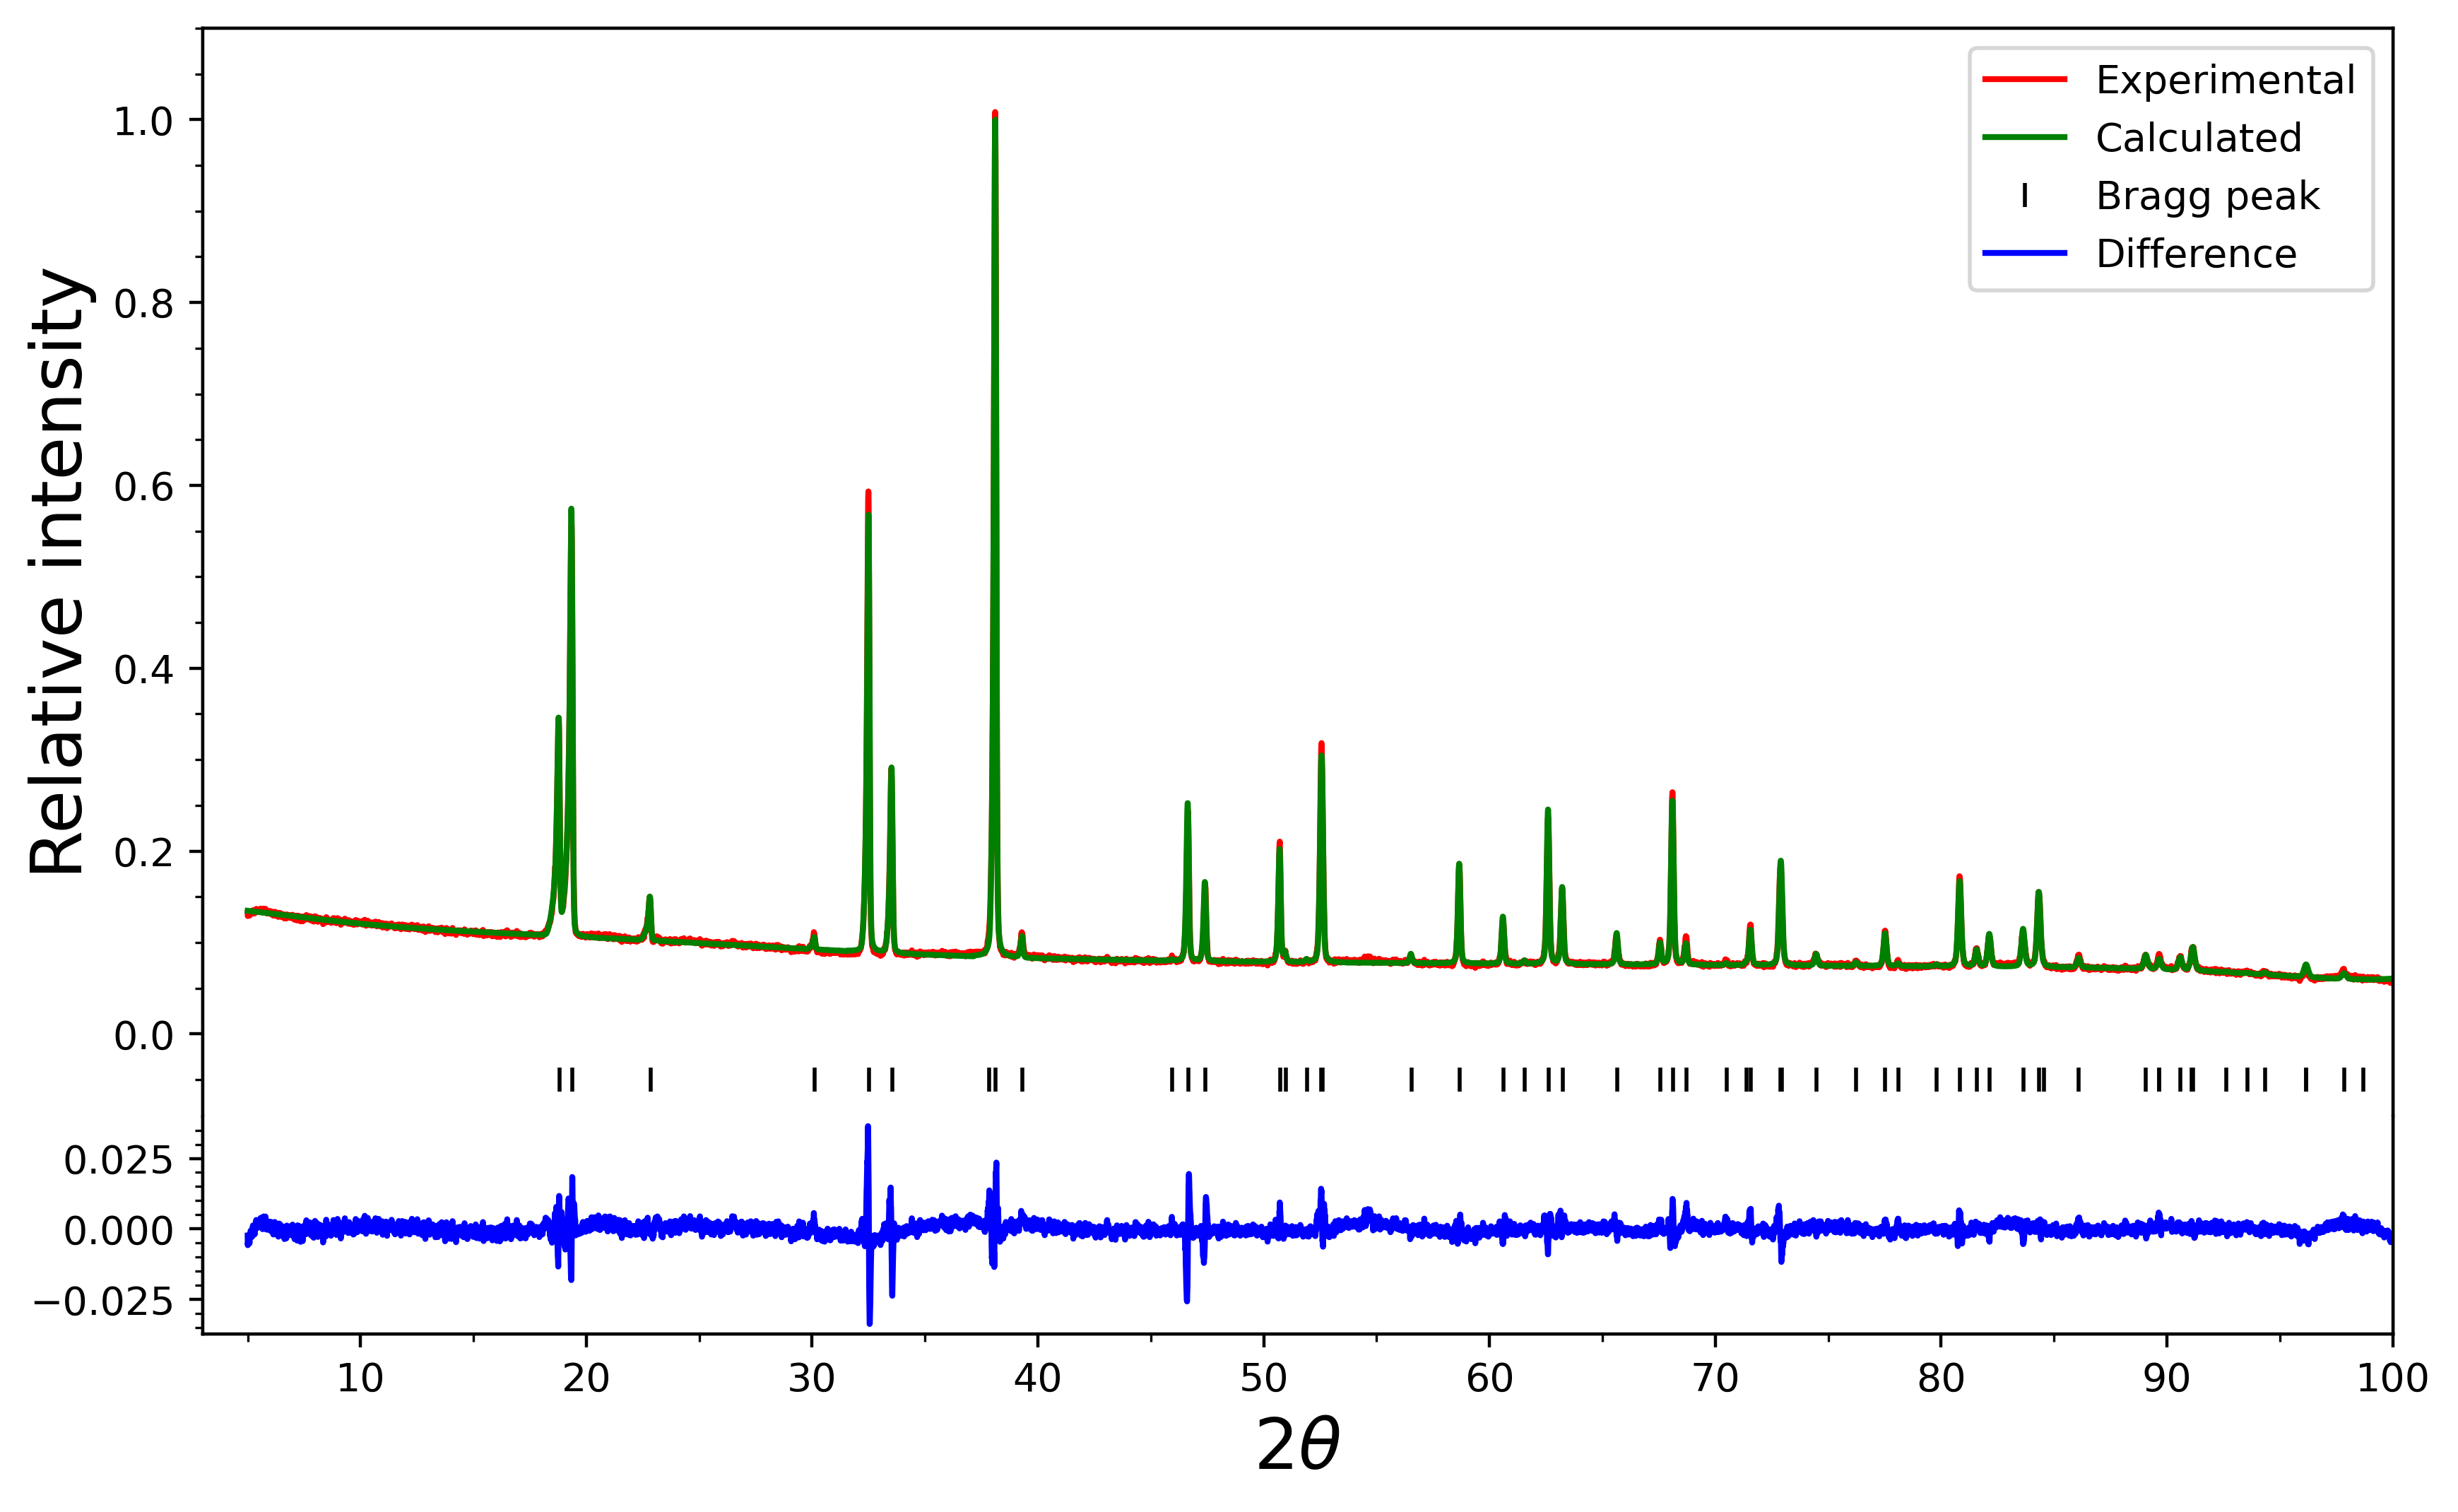

In [57]:
fig,ax= plt.subplots(figsize=(10, 6),dpi=400)
ax.set_yticks([])
ax.set_xticks([])
gs1 = fig.add_gridspec(nrows=6, ncols=10, hspace=0)
ax2 = fig.add_subplot(gs1[:-1, :])
#  интервал основных делений по оси x:
#  интервал основных делений по оси y:
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
#  интервал вспомогательных делений по оси y:
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
plt.xlim(3,100)
plt.ylim(-0.09,1.1)
plt.ylabel("Relative intensity",fontsize=18)
ax2.xaxis.set_tick_params(labelbottom=False)
ax2.set_xticks([])
ax2.plot(theta,exp/m,label="Experimental", color='r')
ax2.plot(theta,ras/m,label="Calculated", color='g')
ax2.plot(breg_x,breg_y,"|",color='k',label='Bragg peak')
ax2.plot(-5,-2,label="Difference", color='b')
plt.legend()
ax1 = fig.add_subplot(gs1[-1,:])
#  интервал основных делений по оси x:
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))
#  интервал вспомогательных делений по оси x:
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(5))
#  интервал основных делений по оси y:
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.025))
#  интервал вспомогательных делений по оси y:
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.005))
plt.xlim(3,100)
ax1.plot(theta,raz/m,color='b')
plt.xlabel("2$\\theta$",fontsize=18)
right_side = ax2.spines["bottom"]
right_side.set_visible(False)
right_s = ax1.spines["top"]
right_s.set_visible(False)
# plt.show()
plt.savefig('rit.png')

## 

In [9]:
b = np.array([ 100,62,22,37,85,36,16,37,47,48,40,23,18,25,18,20,37])

In [12]:
list(map(round,94098.3*b/100 ))


[94098,
 58341,
 20702,
 34816,
 79984,
 33875,
 15056,
 34816,
 44226,
 45167,
 37639,
 21643,
 16938,
 23525,
 16938,
 18820,
 34816]